# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [128]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [129]:
df.rename({
    'GRADES_PK_G':'NUM_PK',
    'GRADES_KG_G':'NUM_KG',
    'GRADES_4_G':'NUM_4',
    'GRADES_8_G':'NUM_8',
    'GRADES_12_G':'NUM_12',
    'GRADES_1_8_G':'NUM_PRIMARY',
    'GRADES_9_12_G':'NUM_HS',
    'GRADES_ALL_G':'NUM_ALL',
    }, axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,NUM_4,NUM_8,NUM_12,NUM_PRIMARY,NUM_HS,NUM_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: 4th Grade Average Math Score (AVG_MATH_4_SCORE)

How many years of data are logged in our dataset? 

In [130]:
AVG_MATH_4_SCORE_OVER_YEARS = df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean()
print(AVG_MATH_4_SCORE_OVER_YEARS.index[-1] - AVG_MATH_4_SCORE_OVER_YEARS.index[0])

29


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [131]:
STATES_AVG_MATH_4_SCORE = df.groupby('STATE')["AVG_MATH_4_SCORE"].mean()
MICH_AVG_MATH_4_SCORE = STATES_AVG_MATH_4_SCORE["MICHIGAN"]
OHIO_AVG_MATH_4_SCORE = STATES_AVG_MATH_4_SCORE["OHIO"]

print("Ohio's 4th graders had an average math score of:", OHIO_AVG_MATH_4_SCORE)
print("Michigan's 4th graders had an average math score of:", MICH_AVG_MATH_4_SCORE)
print("So the state with the higher average math score for 4th graders is:", "Ohio" if MICH_AVG_MATH_4_SCORE < OHIO_AVG_MATH_4_SCORE else "Michigan")

Ohio's 4th graders had an average math score of: 239.45454545454547
Michigan's 4th graders had an average math score of: 234.36363636363637
So the state with the higher average math score for 4th graders is: Ohio


Find the average for your outcome score across all states in 2019

In [132]:
YEARS_AVG_MATH_4_SCORE = df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean()
print("the average 4th grader's math score in 2019 was:", YEARS_AVG_MATH_4_SCORE[2019])

the average 4th grader's math score in 2019 was: 239.9433962264151


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [133]:
STATES_MAX_MATH_4_SCORE = df.groupby("STATE")["AVG_MATH_4_SCORE"].max()
print("the maximum math score of 4th graders for each state is as follows:\n", STATES_MAX_MATH_4_SCORE)

the maximum math score of 4th graders for each state is as follows:
 STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  2

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [134]:
#average inflation was 2.38% for the last 30 years
df["NORMALIZED_TOTAL_EXPENDITURE"] = df["TOTAL_EXPENDITURE"]*(np.power(1.0238, (2019-df["YEAR"]))) #make all dollars in today's dollars
df["NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT"] = df["NORMALIZED_TOTAL_EXPENDITURE"]/df["NUM_ALL"]


Feature engineering justification: 

I normalized the expenditure because the purchasing power of a dollar is different in different years. Therefore I took the average inflation for the last 30 years, and compounded the total expenditure based on the number of years it was away from the latest data point or 2019. This makes it so that a the amount spent in 1990 can be compared accurately to the amount spend in a later year like 2019. 

I also created a normalized total expenditure per student column, as this accurately reflect how much money and resources are being allocated to the students. It makes sense that a larger school would spend more money on education because they need to as they have more kids. However, if a kid goes to a smaller school that school will naturally spend less overall on education. That doesn't make the schools worse than eachother in terms of resources allocated, because the kids might get access to the same resources as they have the same amount of resources spent on them, as the discrepancy in overall spending is only due to size of the school. Therefore, creating a feature for expenditure per student effectively allows us to compare expenditures across differently sized schools and differently sized states.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

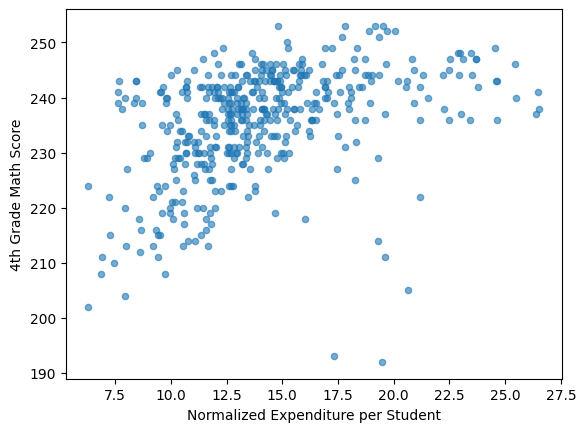

In [135]:
df.plot.scatter(x='NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Normalized Expenditure per Student')
plt.ylabel('4th Grade Math Score')

*The above figure shows the relationship between normalized expenditure per student and 4th grade math scores. From the figure, there does seem to be a weak correlation between the normalized total expenditure and the math scores for 4th graders.* 

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

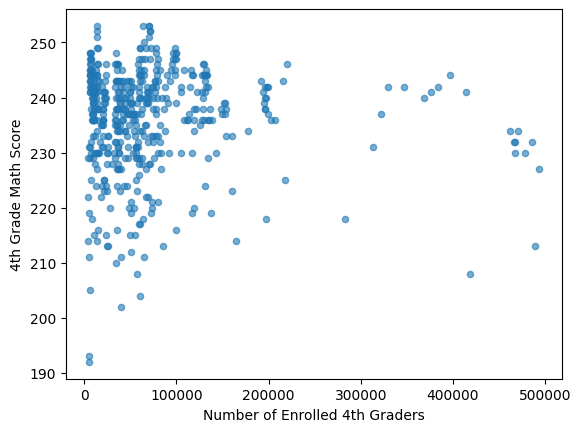

In [136]:
df.plot.scatter(x='NUM_4', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Number of Enrolled 4th Graders')
plt.ylabel('4th Grade Math Score')

*The above figure shows the relationship between number of enrolled 4th graders and 4th grade math scores. From the figure, there doesn't seem to be much correlation between the number of enrolled 4th graders and the math scores for 4th graders.*

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = df[['NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE'] 
y.fillna(y.median(), inplace=True)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [140]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [141]:
# create your model here
model = LinearRegression()

In [142]:
model.fit(X_train, y_train)

LinearRegression()

In [143]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [144]:
ROOT_MEAN_SQUARED_ERROR = np.mean((model.predict(X_test)-y_test)**2)**0.5
R_SQUARED = model.score(X_test, y_test)
MEAN_ABSOLUTE_ERROR = np.mean(np.abs(model.predict(X_test)-y_test))

print("root mean squared error was:", ROOT_MEAN_SQUARED_ERROR)
print("r squared error was:", R_SQUARED)
print("mean absolute error was:", MEAN_ABSOLUTE_ERROR)

root mean squared error was: 6.175783524369534
r squared error was: 0.6534791181495334
mean absolute error was: 4.351731860970819


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

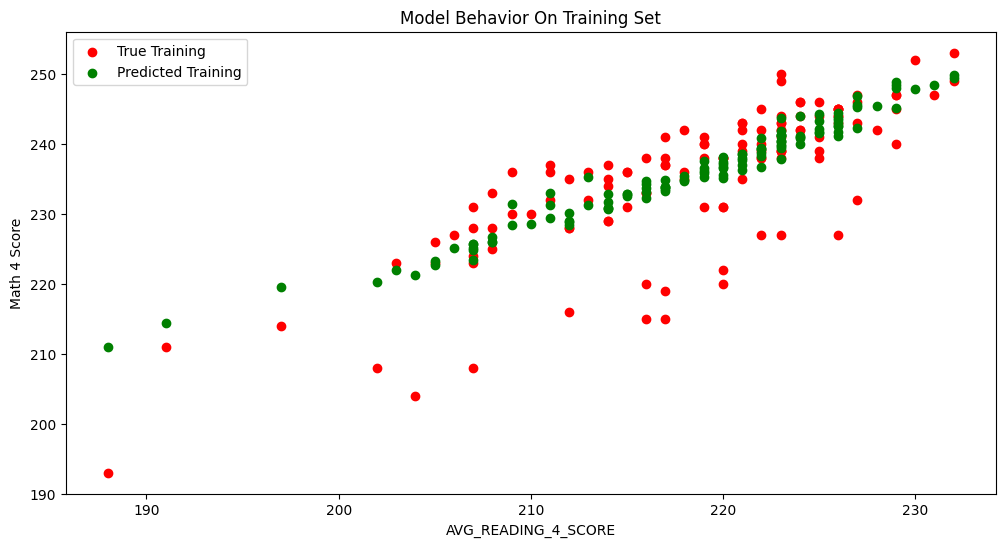

In [145]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior On Training Set")

      NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT  AVG_READING_4_SCORE
870                                  13.209279                216.0
1174                                 24.616925                213.0
39                                   11.331035                217.0
880                                  16.664906                219.0
663                                  11.064784                208.0
...                                        ...                  ...
579                                  11.042188                205.0
598                                  13.158210                218.0
1007                                 19.631782                227.0
1078                                 16.830391                226.0
1000                                 13.223594                208.0

[120 rows x 2 columns]


Text(0.5, 1.0, 'Model Behavior On Training Set')

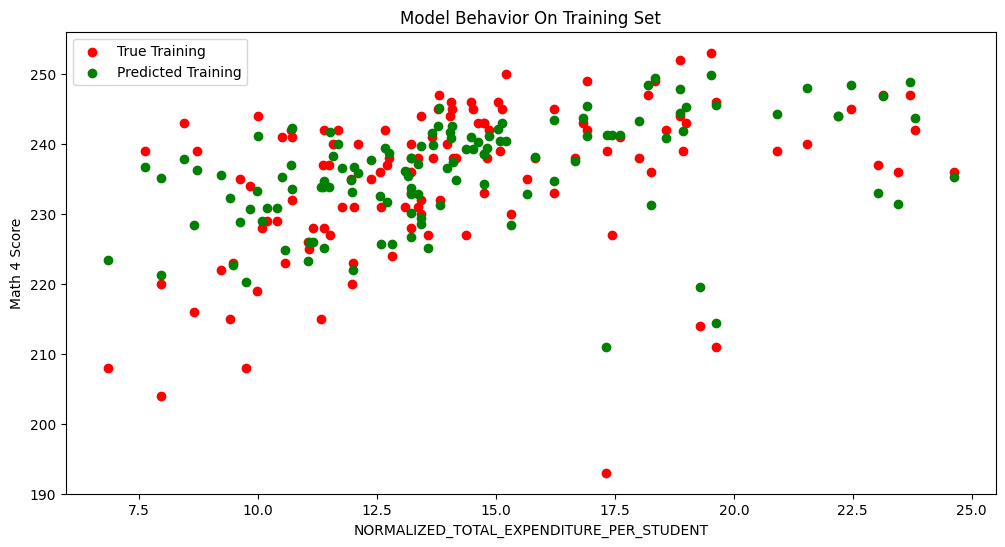

In [146]:
col_name = 'NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT'
print(X_test)

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

After choosing my variable and importing the data, I got a feel for it by doing some EDA. I understood over how much time the data was collected and some key metrics of the data, like the average of the scores in the most recent year, as well as the max scores for each state in the time period of the collected data. Then I engineered some features that I felt would help my model's accuracy, such as normalized expenditure and normalized expenditure per student. I felt like this would allow the data points to be compared to eachother in a more accurate way, reducing confounding factors like inflation.

After creating the features, I modeled the desired prediction variable (math score for 4th graders) against some key features I thought would influence the math score for 4th graders variable, like the normalized expenditure per student and the reading score for 4th graders. Looking at those figures, I decided to keep the normalized expenditure per student as a feature and drop the number of enrolled 4th graders as a feature. As a replacement, I used the 4th graders' score on reading as a feature.

Using these features and data I made a least-squares regression model to predict the math score for 4th graders based off of the number of enrolled 4th graders and the 4th graders' reading score. Based on the evaluation scores, the prediction is relatively good, only being off by ~2% based on the evaluation (4.4 error for absolute mean and 6.2 for root square mean error with the scores being in the 200-250 range). 

What we found is that normalized expenditure per student and reading score for 4th graders are good indicators for the math score for 4th graders, and that our model works relatively well.